**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

Text(0.5, 1.0, 'Imagem 3x3 dupla')

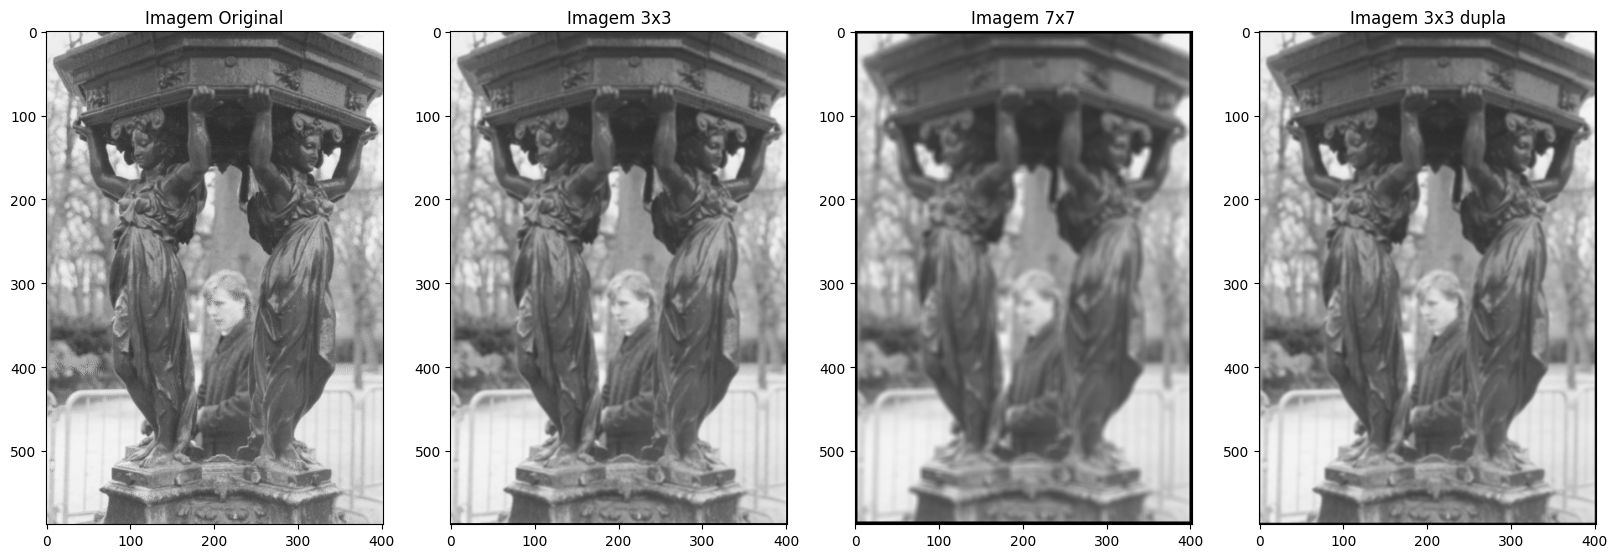

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# code here

img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)

linhas, colunas = img1.shape

def encontrarVizinhanca(matriz, i, j, vizinhanca = 3):
    vizinhos = np.zeros((vizinhanca,vizinhanca))
    distancia = int((vizinhanca-1)/2)
    primeiraLinha = i - distancia
    primeiraColuna = j - distancia

    for linha in range(vizinhanca):
        for coluna in range(vizinhanca):
            temp = matriz[primeiraLinha+linha][primeiraColuna+coluna]
            vizinhos[linha][coluna] = temp

    return vizinhos


mask3x3 = np.ones([3,3], dtype=int)
mask3x3 = mask3x3/(3**2)

mask7x7 = np.ones([7,7], dtype=int)
mask7x7 = mask7x7/(7**2)


img3x3 = np.zeros(img1.shape)
for i in range(1, linhas-1):
    for j in range (1, colunas-1):
        img3x3[i][j] = np.sum(np.multiply(mask3x3,encontrarVizinhanca(img1,i,j)))


img7x7 = np.zeros(img1.shape)
for i in range(3, linhas-3):
    for j in range (3, colunas-3):
        img7x7[i][j] = np.sum(np.multiply(mask7x7,encontrarVizinhanca(img1,i,j,vizinhanca=7)))


img3x3dupla = np.zeros(img1.shape)
for i in range(1, linhas-1):
    for j in range (1, colunas-1):
        img3x3dupla[i][j] = np.sum(np.multiply(mask3x3,encontrarVizinhanca(img3x3,i,j)))


figura = plt.figure(figsize = (20,20))

figura.add_subplot(1,4,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Original')

figura.add_subplot(1,4,2)
plt.imshow(img3x3, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem 3x3')

figura.add_subplot(1,4,3)
plt.imshow(img7x7, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem 7x7')

figura.add_subplot(1,4,4)
plt.imshow(img3x3dupla, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem 3x3 dupla')




2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


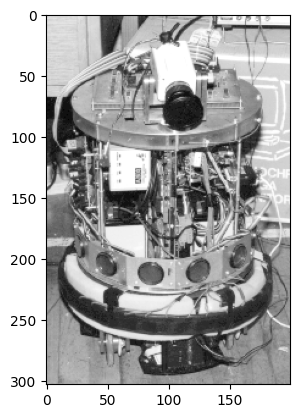

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


#  code here
img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

def filtroGaussiano(desvio, tamanho):
    filtro = np.zeros((tamanho,tamanho))
    fator = (1/np.sqrt(2*np.pi*(desvio**2)))

    for i in range(tamanho):
        for j in range(tamanho):
            x = i - (tamanho-1)/2
            y = j - (tamanho-1)/2
            filtro[i][j] = fator * np.e **(-(x**2 + y**2)/(2*(desvio**2)))


    filtro = filtro/np.sum(filtro)
    return filtro



print(filtroGaussiano(1,3))

3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

Text(0.5, 1.0, 'Imagem 7x7')

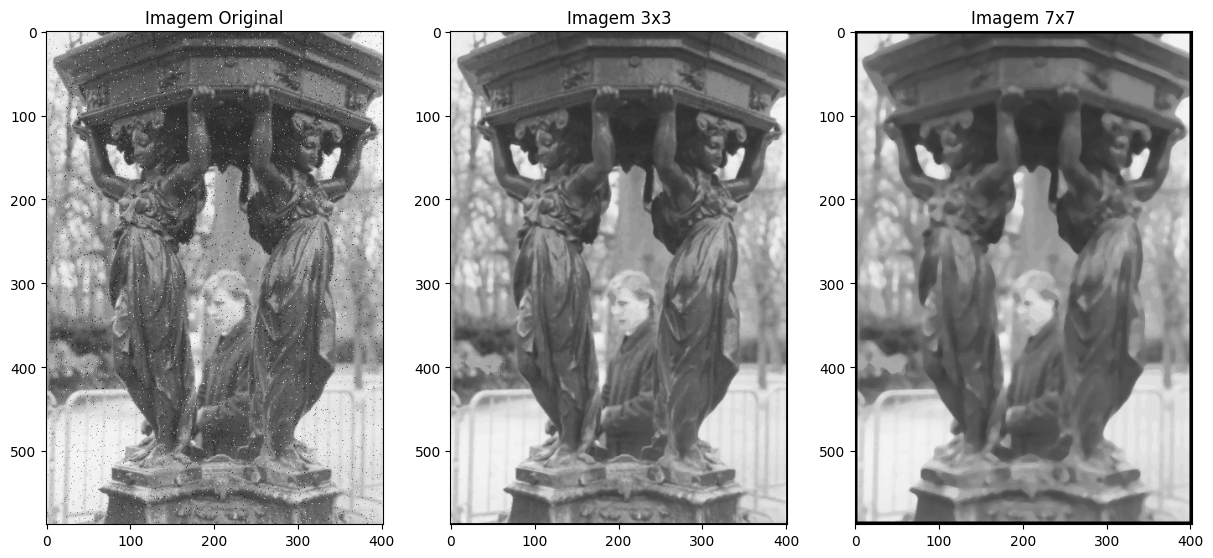

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# code here

img3 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)

linhas, colunas = img3.shape

def encontrarVizinhanca(matriz, i, j, vizinhanca = 3):
    vizinhos = np.zeros((vizinhanca,vizinhanca))
    distancia = int((vizinhanca-1)/2)
    primeiraLinha = i - distancia
    primeiraColuna = j - distancia

    for linha in range(vizinhanca):
        for coluna in range(vizinhanca):
            temp = matriz[primeiraLinha+linha][primeiraColuna+coluna]
            vizinhos[linha][coluna] = temp

    return vizinhos

img3x3 = np.zeros(img3.shape)
for i in range(1, linhas-1):
    for j in range (1, colunas-1):
        img3x3[i][j] = np.median(encontrarVizinhanca(img3,i,j))

img7x7 = np.zeros(img3.shape)
for i in range(3, linhas-3):
    for j in range (3, colunas-3):
        img7x7[i][j] = np.median(encontrarVizinhanca(img3,i,j,vizinhanca=7))


figura = plt.figure(figsize = (20,20))

figura.add_subplot(1,4,1)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Original')

figura.add_subplot(1,4,2)
plt.imshow(img3x3, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem 3x3')

figura.add_subplot(1,4,3)
plt.imshow(img7x7, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem 7x7')

4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper
- 3×3 filter;	7×7 filter

Text(0.5, 1.0, 'Imagem 7x7')

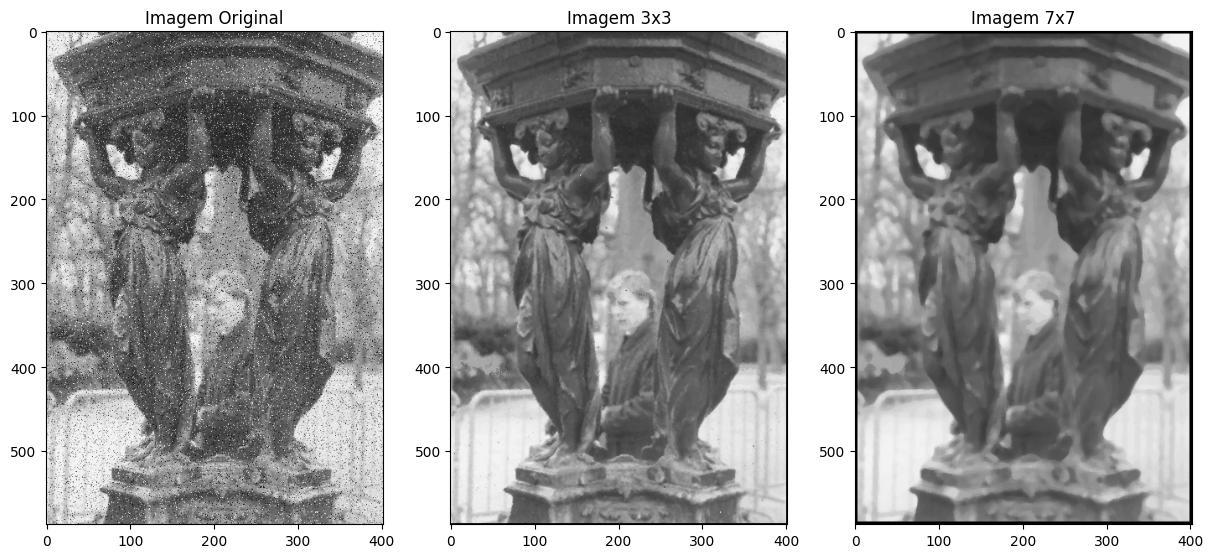

In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# code here

img3 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)

linhas, colunas = img3.shape

def encontrarVizinhanca(matriz, i, j, vizinhanca = 3):
    vizinhos = np.zeros((vizinhanca,vizinhanca))
    distancia = int((vizinhanca-1)/2)
    primeiraLinha = i - distancia
    primeiraColuna = j - distancia

    for linha in range(vizinhanca):
        for coluna in range(vizinhanca):
            temp = matriz[primeiraLinha+linha][primeiraColuna+coluna]
            vizinhos[linha][coluna] = temp

    return vizinhos

img3x3 = np.zeros(img3.shape)
for i in range(1, linhas-1):
    for j in range (1, colunas-1):
        img3x3[i][j] = np.median(encontrarVizinhanca(img3,i,j))

img7x7 = np.zeros(img3.shape)
for i in range(3, linhas-3):
    for j in range (3, colunas-3):
        img7x7[i][j] = np.median(encontrarVizinhanca(img3,i,j,vizinhanca=7))


figura = plt.figure(figsize = (20,20))

figura.add_subplot(1,4,1)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Original')

figura.add_subplot(1,4,2)
plt.imshow(img3x3, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem 3x3')

figura.add_subplot(1,4,3)
plt.imshow(img7x7, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem 7x7')